This data set allows you to build a recommendation engine. 

Road map 
 

In [1]:
# packages and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'D:\\ml-1m\\ml-1m\\'

In [22]:
#for line in open(path+'movies.dat','r'):
   # text += line.rstrip()

In [3]:
movies = pd.read_table(path+'movies.dat',encoding='latin-1',sep='::',names=['Id','Title','Genres'])

C:\Users\amogh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
movies.head()

,Id,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [91]:
dummy = movies['Genres'].str.get_dummies(sep='|')

In [95]:
movies_concat = pd.concat([movies,dummy],axis=1)

In [4]:
rating = pd.read_table(path+'ratings.dat',names=['UserID','Id','Rating','Timestamp'],sep="::")

C:\Users\amogh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
rating.head()

,UserID,Id,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
users = pd.read_table(path+'users.dat',sep='::',names=['UserID','Gender','Age','Occupation','Zip-codeAll'])

C:\Users\amogh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [7]:
users.head()

,UserID,Gender,Age,Occupation,Zip-codeAll
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
dataset1 = pd.merge(pd.merge(movies,rating),users)

In [9]:
dataset1.head()

,Id,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-codeAll
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [116]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
Id        3883 non-null int64
Titel     3883 non-null object
Genres    3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [117]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID         6040 non-null int64
Gender         6040 non-null object
Age            6040 non-null int64
Occupation     6040 non-null int64
Zip-codeAll    6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [118]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
Id           1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [29]:
rating_total1 = dataset1.groupby('Title').size()

In [30]:
rating_total1.head()

Title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [ ]:
# Popular rating and movies 

In [ ]:
# here recommendation is done by popularity of movie title and rating 

In [7]:
rating_mean = dataset1.groupby('Title')['Title','Rating'].mean()

In [25]:
rating_mean.head()

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [31]:
rating_total = pd.DataFrame({'movie_title':rating_total1.index,'total_rating':rating_total1.values})

In [32]:
rating_mean['movie_title'] = rating_mean.index

In [36]:
final2= pd.merge(rating_total,rating_mean)

In [37]:
#final.drop(['movie title'],axis=1,inplace= True)

In [39]:
final2 = final2.sort_values(by='total_rating',ascending=False)

In [40]:
final2.describe()

,total_rating,Rating
count,3706.000000,3706.000000
mean,269.889099,3.238892
std,384.047838,0.672925
min,1.000000,1.000000
25%,33.000000,2.822705
50%,123.500000,3.331546
75%,350.000000,3.740741
max,3428.000000,5.000000


In [41]:
final = final2[:400].sort_values(by = 'Rating',ascending=False)

In [42]:
final.head()

,movie_title,total_rating,Rating
2970,"Shawshank Redemption, The (1994)",2227,4.554558
1354,"Godfather, The (1972)",2223,4.524966
3504,"Usual Suspects, The (1995)",1783,4.517106
2901,Schindler's List (1993),2304,4.510417
3675,"Wrong Trousers, The (1993)",882,4.507937


In [100]:
len(users['UserID'].unique())

6040

In [44]:

dataset1['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

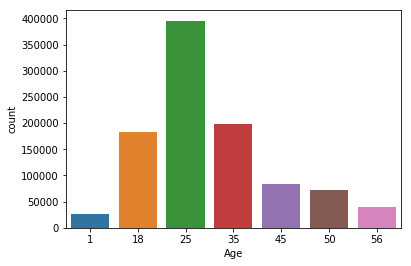

In [48]:
%matplotlib inline
sns.countplot(dataset1['Age'])

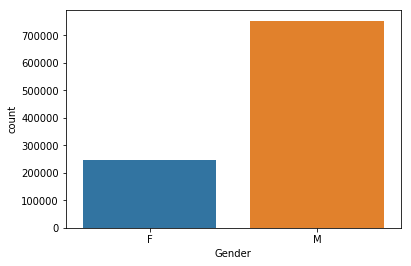

In [49]:
sns.countplot(dataset1['Gender'])

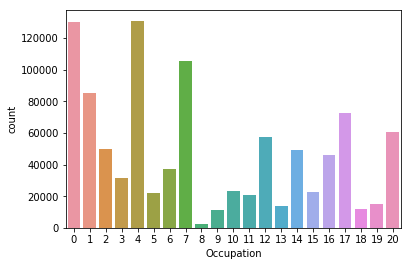

In [50]:
sns.countplot(dataset1['Occupation'])

In [53]:
dataset1.isnull().sum()

Id             0
Title          0
Genres         0
UserID         0
Rating         0
Timestamp      0
Gender         0
Age            0
Occupation     0
Zip-codeAll    0
dtype: int64

In [54]:
# Collaborative Filtering

Most collaborative filtering systems apply the so called neighborhood-based technique. In the neighborhood-based approach a number of users is selected based on their similarity to the active user. 
A prediction for the active user is made by calculating a weighted average of the ratings of the selected users.

In [8]:
from surprise import evaluate

In [9]:
from surprise import Dataset


In [164]:
#from sklearn.preprocessing import LabelEncoder

In [10]:
from surprise import KNNBasic

In [11]:
data = dataset1[['UserID','Title','Rating']]

In [12]:
from surprise import Reader

In [13]:
data_load = Dataset.load_from_df(data,reader=Reader(rating_scale = (1,5)))

In [14]:
sim_options = {
    'name': 'cosine',
    'user_based': False
}
knn = KNNBasic(sim_options=sim_options)

In [32]:
test= data_load.construct_testset?

In [15]:
threshold = int(.9 * len(data_load.raw_ratings))  

In [16]:
train= data_load.raw_ratings[:threshold]

In [17]:
train_ = data_load.construct_trainset(train)

In [18]:
threshold = int(.1 * len(data_load.raw_ratings))  

In [19]:
test = data_load.raw_ratings[:threshold]

In [20]:
test_ = data_load.construct_testset(test)

In [15]:
train = data_load.construct_testset

In [16]:
train 

<bound method Dataset.construct_testset of <surprise.dataset.DatasetAutoFolds object at 0x00000206D0B844E0>>

In [ ]:
train = data_load.n_folds

In [ ]:
train = data_load.split

In [21]:
knn.train(train_)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [22]:
predict = knn.test(test_)

In [23]:
from collections import defaultdict

In [41]:
def recommendations(predict,top=3):
    top_recs = defaultdict(list)
    for uid,iid,r_ui,est, _ in predict:
        top_recs[uid].append((iid,est))
        
        
    for uid, user_ratings in top_recs.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_recs[uid] = user_ratings[:top]
    
    return top_recs

In [42]:
recommendations(predict)

defaultdict(list,
            {1: [('Pocahontas (1995)', 4.3014248124818621),
              ('Dumbo (1941)', 4.2764086048887995),
              ('Titanic (1997)', 4.2757067487959812)],
             6: [('Anastasia (1997)', 4.2768850262628018),
              ('Pretty Woman (1990)', 4.2270063439203751),
              ('Gypsy (1962)', 4.2025244441347844)],
             8: [('Desperado (1995)', 4.4256825015962109),
              ('Matrix, The (1999)', 4.4014672419079117),
              ('Pulp Fiction (1994)', 4.3770918618887791)],
             9: [('Chasing Amy (1997)', 4.2244425031095165),
              ("Wayne's World (1992)", 4.20027147345297),
              ('Silence of the Lambs, The (1991)', 4.1512848208939905)],
             10: [('Inspector General, The (1949)', 4.6747578402401357),
              ("Darby O'Gill and the Little People (1959)",
               4.6010926299911974),
              ('Men in Black (1997)', 4.600783367311716)],
             18: [('Toy Story (1995)', 4.724480